<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Applied Machine Learning</h1><h2>Mini Project </h2><h3></h3></th>
    </tr>
</table>

In [2]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Computer_Science_Files/NUS_courses/Applied_Machine_Learning/Applied_ML/Practical' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Computer_Science_Files/NUS_courses/Applied_Machine_Learning/Applied_ML/Practical


In [3]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense



You will be using the bank marketing campaign data to build classification model. The dataset (`bank.csv`) gives you information about a marketing campaign done by a financial institution. Detailed information (i.e. column description) is provided below. We are trying to predict whether the customer/client will deposit the money into the bank or not?

 * **age :**  age in years
 * **job :**  type of job
 * **marital :**  marital status
 * **education :**  education background
 * **default :**  has credit in default?
 * **balance :**  Balance of the individual
 * **housing :**  has housing loan?
 * **loan :**  has personal loan?
 * **contact :**  contact communication type
 * **day :**  last contact day of the week
 * **month :**  last contact month of year
 * **duration :**  last contact duration, in seconds
 * **campaign :**  number of contacts performed during this campaign and for this client
 * **pdays :**  number of days that passed by after the client was last contacted from a previous campaign
 * **previous :**  number of contacts performed before this campaign and for this client
 * **poutcome :**  outcome of the previous marketing campaign
 * <font color='red'> **deposit :** has the client subscribed a term deposit? This is the TARGET variable </font>

We have provided data preprocessing codes per below

In [4]:
# Loading the data
bank = pd.read_csv('bank.csv')
print(bank.head())
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)
print(bank.head())

# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Scaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 

In [5]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10713,0.311590,-1.399276,-0.323496,2.287973,-0.119149,0.150938,-0.942781,-0.389825,-0.598686,1.463949,0.806711,-0.939404,0.531137,-0.479882,-0.375551,0.518328
8431,1.233067,-1.399276,-0.323496,-1.715942,-0.119149,-0.415907,1.060573,-0.389825,1.845607,-0.797574,0.806711,-0.565266,-0.192912,-0.479882,-0.375551,0.518328
9060,0.730443,-0.467874,1.274123,-0.381304,-0.119149,-0.231086,-0.942781,-0.389825,0.623460,1.463949,-0.444320,-0.896235,-0.554937,-0.479882,-0.375551,0.518328
8604,1.400608,-1.399276,-0.323496,-0.381304,-0.119149,-0.025215,1.060573,2.564968,1.845607,-1.273684,0.181196,-0.925014,9.581747,-0.479882,-0.375551,0.518328
2988,0.144049,-0.157407,1.274123,0.953334,-0.119149,3.202795,-0.942781,-0.389825,-0.598686,-1.392711,-1.069836,1.285282,0.893161,1.778920,0.083679,-0.485173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,-1.028739,1.705397,1.274123,-1.715942,-0.119149,-0.308172,-0.942781,-0.389825,-0.598686,1.582977,-0.444320,1.227722,-0.554937,-0.479882,-0.375551,0.518328
2514,-1.531363,1.084462,1.274123,-0.381304,-0.119149,-0.345013,-0.942781,-0.389825,-0.598686,-0.321464,-1.382594,0.349935,-0.192912,-0.479882,-0.375551,0.518328
6637,-0.191033,-0.157407,-0.323496,0.953334,-0.119149,-0.478442,1.060573,-0.389825,-0.598686,-0.559519,0.806711,-0.755213,-0.554937,-0.479882,-0.375551,0.518328
2575,1.568149,-1.399276,-0.323496,-0.381304,-0.119149,-0.445627,-0.942781,-0.389825,-0.598686,0.630757,-1.382594,-0.455902,0.169112,0.375303,0.083679,-0.485173


In [6]:
y_train

10713    0
8431     0
9060     0
8604     0
2988     1
        ..
1099     1
2514     1
6637     0
2575     1
7336     0
Name: deposit, Length: 8929, dtype: int64

# SVM model

In [12]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [13]:
print('train acc: ', clf.score(X_train, y_train))
print('test acc: ', clf.score(X_test, y_test))

train acc:  0.8425355582932019
test acc:  0.8204209583519928


In [9]:
# Evaluate Model performance using Test Data
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[965 222]
 [179 867]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1187
           1       0.80      0.83      0.81      1046

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



From the SVM model we can see that the train and test accuracies are ideal, and suggests that there is a 82% accuracy rate of predicting whether a customer will deposit or not.

# ANN Model

In [14]:
X_train.shape

(8929, 16)

In [28]:
# Define the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape = (16,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                340       
                                                                 
 dense_13 (Dense)            (None, 15)                315       
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [30]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [31]:
# fit the keras model on the dataset

history = model.fit(X_train, y_train, epochs=500, batch_size=100, validation_data = (X_test, y_test))

Epoch 1/500
90/90 [==============================] - 1s 3ms/step - loss: 0.7144 - accuracy: 0.5641 - val_loss: 0.6220 - val_accuracy: 0.6614
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7076 - val_loss: 0.5055 - val_accuracy: 0.7622
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7805 - val_loss: 0.4487 - val_accuracy: 0.7953
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8028 - val_loss: 0.4355 - val_accuracy: 0.7989
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8076 - val_loss: 0.4301 - val_accuracy: 0.8070
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8103 - val_loss: 0.4257 - val_accuracy: 0.8088
Epoch 7/500
90/90 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8097 - val_loss: 0.4240 - val_accuracy: 0.8092
Epoch 8/500
9

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

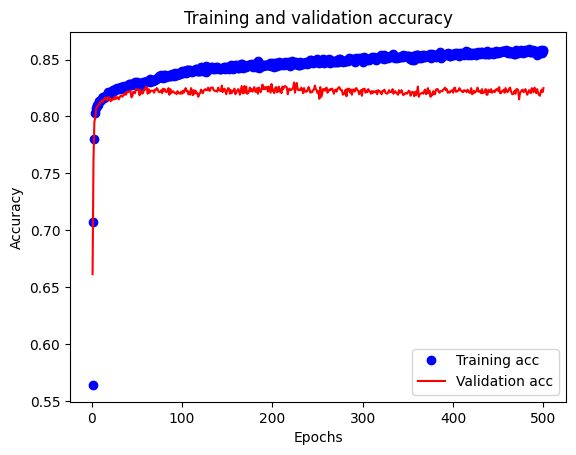

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [34]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('train acuracy: ', train_acc)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test acuracy: ', test_acc)

train acuracy:  0.861574649810791
test acuracy:  0.8248992562294006


ANN Model produces good accuracy, similar results as the SVM model.